## UCLA model trained on the UCLA dataset without visual attributes evaluation

In [4]:
import sys
sys.path.append("../../venv/lib/python3.6/site-packages/")
sys.path.append("..")

In [5]:
import os
import pandas as pd
from lib import analysis_utils as au
import matplotlib.pyplot as plt
import scipy
import numpy as np

### Load the data

In [6]:
pred_dir = "models_preds"
# file_name = "UCLA_model_UCLA_dataset_without_visual_attributes_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300.csv"
file_name = 'UCLA_model_two_round_train_multitask_datalen-40720_epochs-100_init_lr-0_round-201_momentum-0.csv'
preds = pd.read_csv(os.path.join(pred_dir, file_name))
        
print ("loaded ", len(preds), " rows")

loaded  2329  rows


In [7]:
preds

,imageHASH,name,violence,protest,preds_violence
0,64adf672a10584f0,train-15308.jpg,0.415880,True,0.395436
1,d71c3e5ecada3534,test-06509.jpg,0.162512,True,0.235304
2,70848d9e4e5c787c,train-12047.jpg,0.302167,True,0.229807
3,354dcf313c36382e,train-09578.jpg,0.241548,True,0.255399
4,c3c7fe38d8981823,train-15660.jpg,0.206075,True,0.241508
5,c9698b2b869e96ec,train-30511.jpg,0.311139,True,0.316705
6,886261d353521252,train-13907.jpg,0.491170,True,0.465371
7,70c6b9b973336434,test-04636.jpg,0.313342,True,0.292712
8,98e0b23065c9d8ea,train-07311.jpg,0.396529,True,0.393262
9,c24a49cbc9c90900,train-26196.jpg,0.623421,True,0.387164


### Protest

In [8]:
# au.plotROC("protest", preds["protest"], preds["pred_protest"])

### Violence

Text(0.5,1,'violence (Correlation = 0.691, R_squared = 0.477 )')

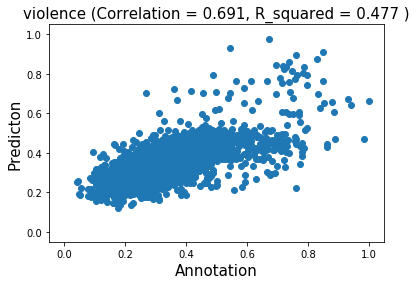

In [10]:

# remove masked values from test set
non_masked_violence_true = preds[preds["violence"] != - 1]["violence"]
non_masked_violence_preds = preds[preds["violence"] != - 1]["preds_violence"]

fig, ax = plt.subplots()
plt.scatter(non_masked_violence_true, non_masked_violence_preds, label = "violence")
plt.xlim([-.05,1.05])
plt.ylim([-.05,1.05])
plt.xlabel('Annotation', fontsize = 15)
plt.ylabel('Predicton', fontsize = 15)
corr, pval = scipy.stats.pearsonr(non_masked_violence_true, non_masked_violence_preds)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(non_masked_violence_true,non_masked_violence_preds)
r_squared = r_value ** 2
plt.title(('{attr} (Correlation = {corr:.3f}, R_squared = {r_2:.3f} )'
            .format(attr = "violence", corr= corr, r_2 = r_squared)), fontsize = 15)
